# A prettier visualisation of the HEATMASTER data

In [1]:
#import the libs
import plotly as py
import plotly.graph_objs as go
import plotly.io as pio
py.offline.init_notebook_mode()

import matplotlib.pyplot as plt

import networkx as nx
import pandas as pd


In [2]:
#Import the data
conversionAssets_file = 'conversionAssets.csv'  
connectionLinks_file = 'connectionLinks.csv'

conversionAssets = pd.read_csv(conversionAssets_file, sep=',', header=17).fillna('0')
connectionLinks = pd.read_csv(connectionLinks_file, header=16).fillna(100000)
connectionLinks = connectionLinks[connectionLinks.iloc[:,7] == 'Existing']
#fix column namens
colnames = list(connectionLinks)
connectionLinks.rename(columns={
    colnames[0]:'id',
    colnames[1]:'from',
    colnames[2]:'to',
    colnames[3]:'feedstock',
    colnames[4]:'max_capacity',
    'Owner':'owner'
}, inplace = True)

#lets remove all links that pont to nen-existing asetIDs
conversionAssets = conversionAssets[conversionAssets.iloc[:,3] == 'existing']
conversionAssets = conversionAssets[conversionAssets.iloc[:,2] != 'TenneT380Simonsh_cust']
conversionAssets = conversionAssets[conversionAssets.iloc[:,2] != 'TenneT380MV_cust']
colnames = list(conversionAssets)

#df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'}, inplace=True)
conversionAssets.rename(columns={
    colnames[2]:'id',
    colnames[12]:'description',
    colnames[14]:'feedstocks',
    colnames[15]:'inputs'
}, inplace = True)

#Fix NatGas and Natgas
connectionLinks.iloc[:,3].replace(['NatGas'], 'Natgas', inplace = True)
#connectionLinks = connectionLinks 

feedstocks = list(connectionLinks['feedstock'].unique())
feedstocks.sort()

line_colors = {
    'Coal' : 'brown',
    'Natgas' : 'orange',
    'Refgas' : 'darkgrey',
    'Petcokes' : 'black',
    'Resfuel' : 'brown',
    'Oilrest' : 'olive',
    'Waste' : 'black',
    'Electricity':'cyan',
    'Steam':'green',
    'Htheat':'red',
    'Ltheat':'darkred' ,
    'H2':'blue' ,
}

creatorText = "Created by <a href = 'https://complexevo.org/'>Igor Nikolic </a> <br><a href = 'https://twitter.com/ComplexEvo'>@ComplexEvo</a>"
dataSourceText = "<br>Data source: HEATMASTER project</a>"
#visualisationSurceText = "<br>Visualisation source:<br><a href='https://github.com/igornikolic/FTM/tree/master/Europarties'> https://github.com/igornikolic/FTM/tree/master/Europarties</a>"
#licenceText = "<br>Licence: <a href='https://creativecommons.org/licenses/by-sa/4.0/'>CC BY-SA 4.0</a>"
noteText = creatorText + dataSourceText #+ licenceText

#conversionAssets.iloc[:,2].apply(lambda x:x in connectionLinks.iloc[:,1].tolist() + connectionLinks.iloc[:,2].tolist()).unique()
#connectionLinks.columns
#noteText

In [3]:
#connectionLinks.iloc[:,3]
#connectionLinks.columns

In [7]:
#setup the network
#create a netowkr object
network = nx.MultiDiGraph()

network = nx.from_pandas_edgelist(connectionLinks,
                                'from',
                                'to',
                                ['id', 'feedstock', 'max_capacity', 'owner'])
network.add_nodes_from(conversionAssets.iloc[:,2])

#for e in nx.edges(network):
#    print(e('id'))


In [8]:
#labels = conversionAssets.filter(conversionAssets.iloc[:,2],conversionAssets.iloc[:,12]).to_dict()
labels = dict( zip(conversionAssets['id'].values, conversionAssets['description'].values ) )

In [9]:
node_pos =  nx.spring_layout(network, k = 7.0, iterations=500)#,  weight = linkCapacity.values())
#node_pos = nx.spectral_layout(network)
#shells = [[0], [1,2,3]]
#node_pos = nx.shell_layout(network, shells)



In [10]:
#edge_pos.get_array()

/home/igor/.local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning:

isinstance(..., numbers.Number)



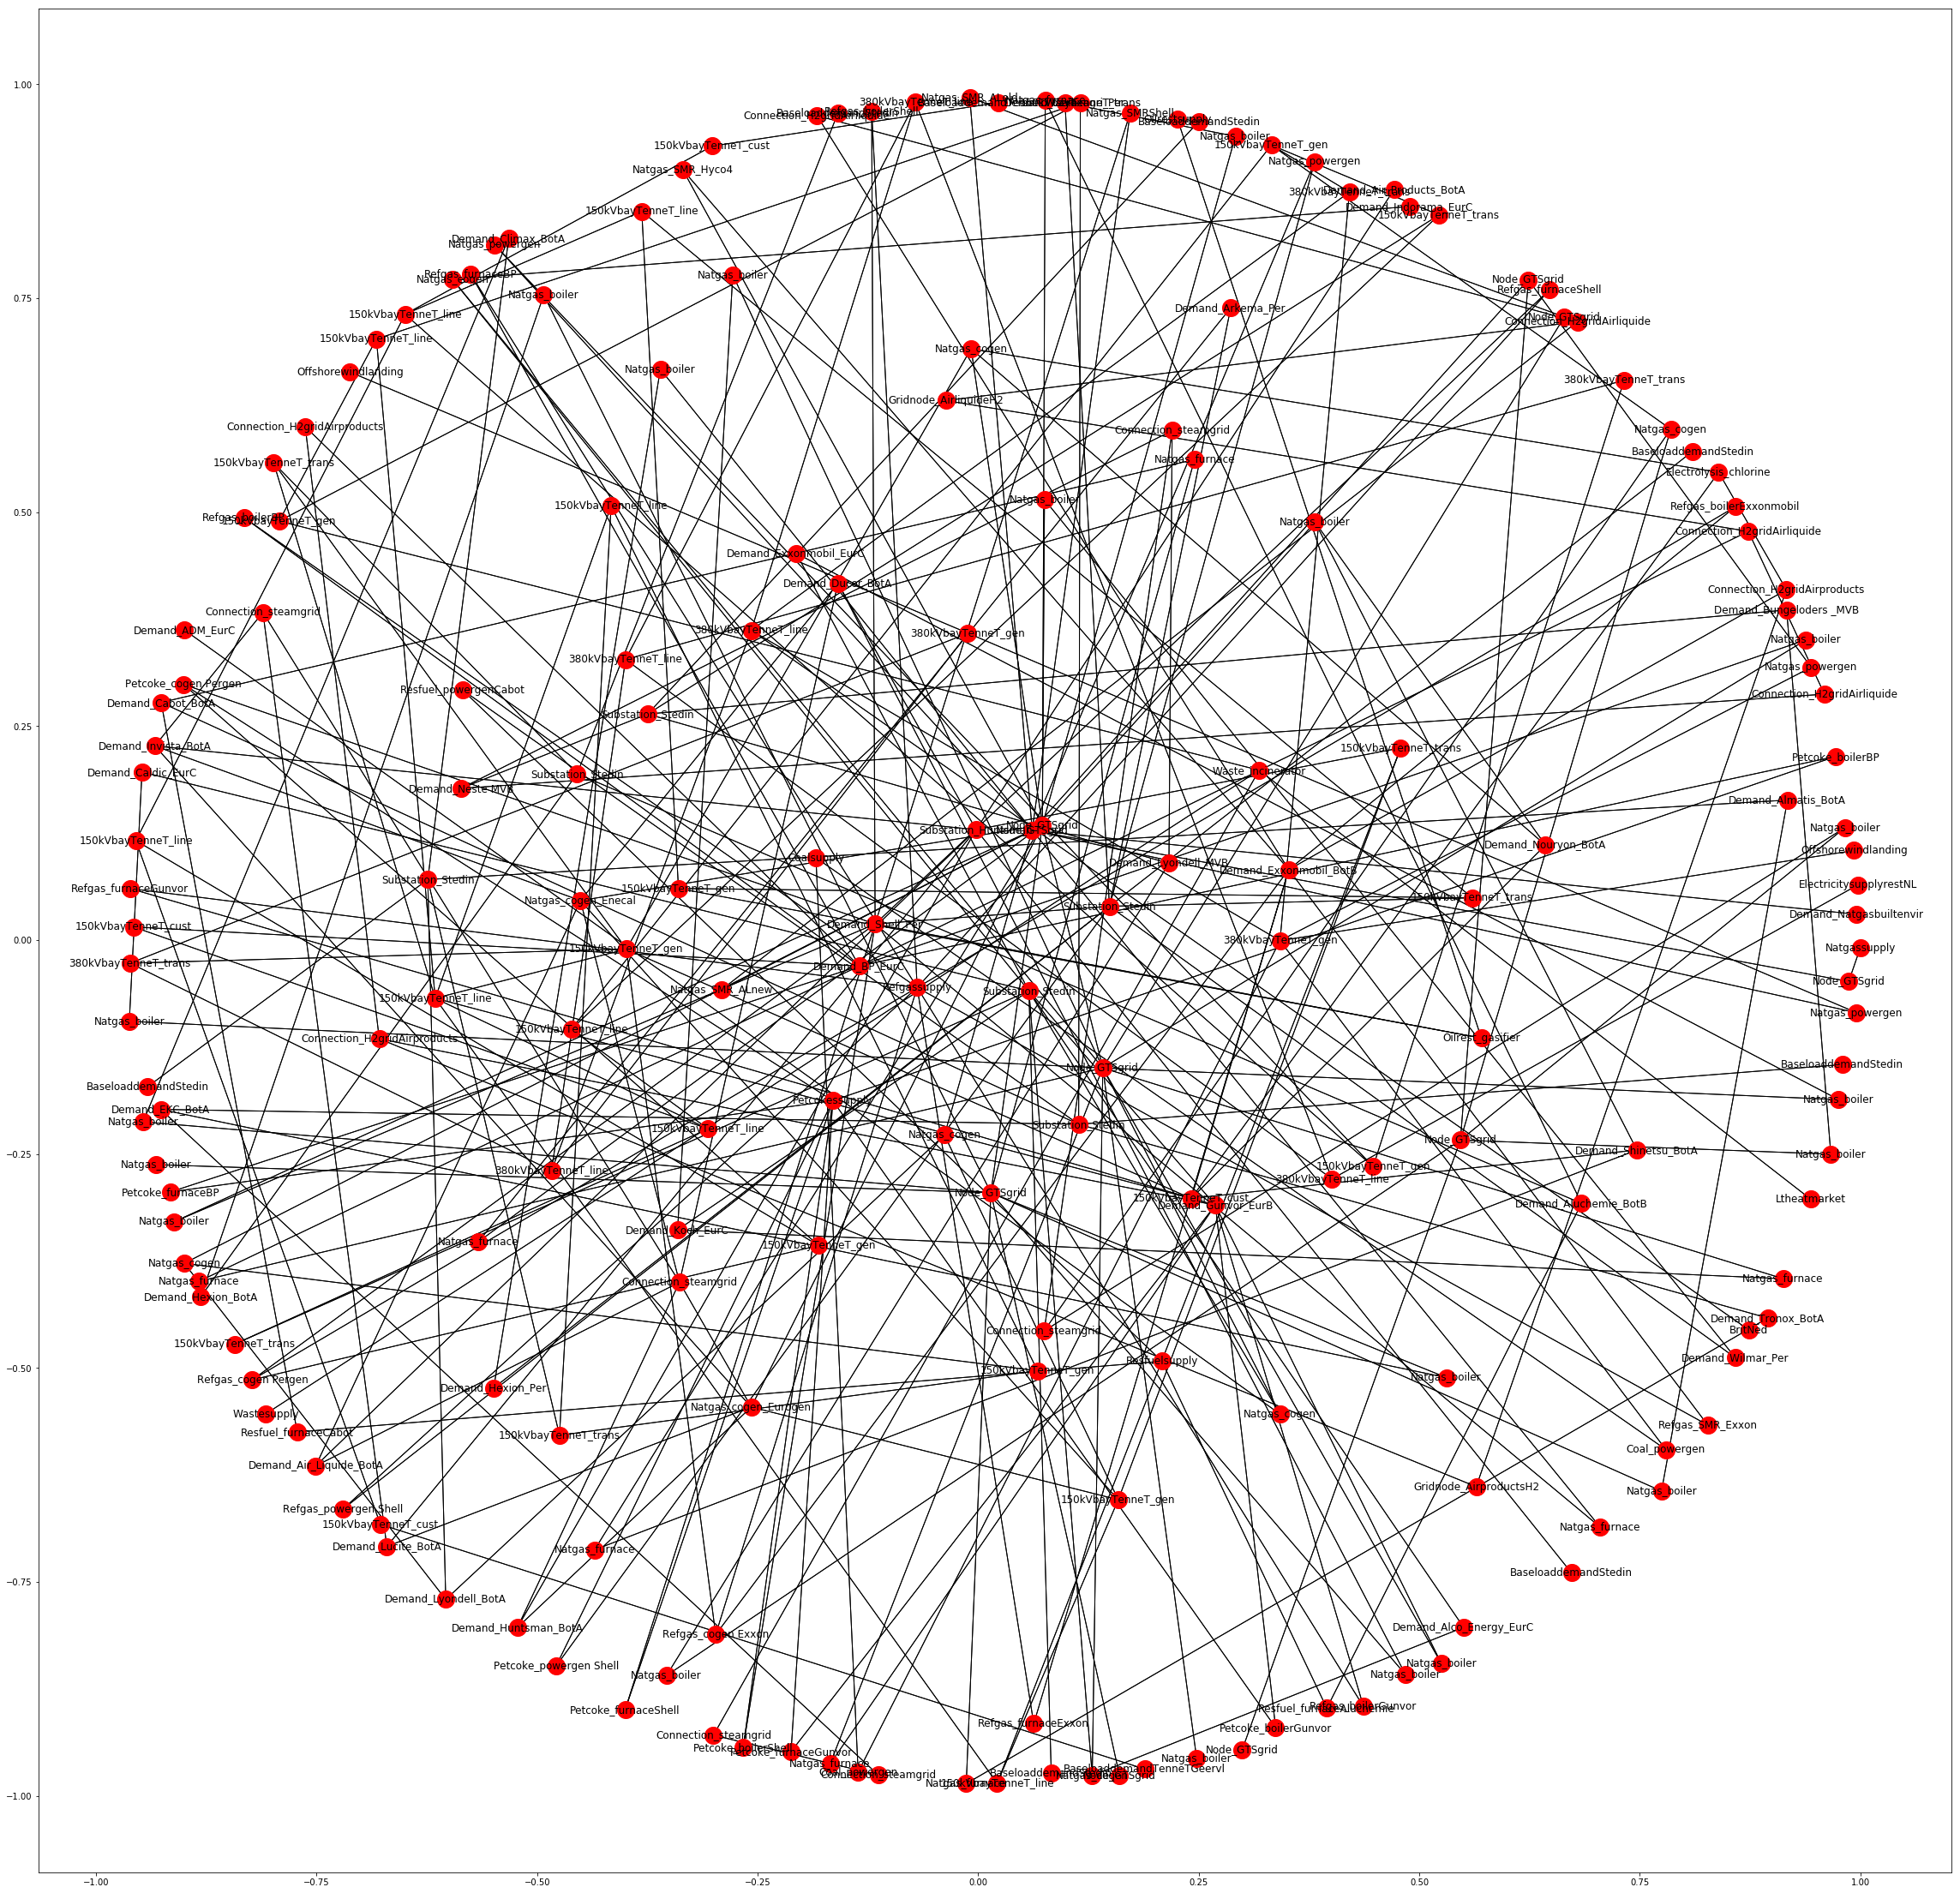

In [11]:
plt.figure(1,figsize=(40,40))
nx.draw_networkx(network,node_pos, labels=labels,node_size=400,font_size=12)

edge_pos = nx.draw_networkx_edges(network,node_pos)
#nx.draw_networkx_labels(network,node_pos,labels=labels)

In [12]:
#edge_pos.get_paths()


# Draw with plotly

In [13]:
edge_segments = edge_pos.get_segments()

#Add information to nodes and edges

#make a dict of label:MWs
#MWs are astring of MWs of various inpuet per energy carrier, defined in efficiencies list
input_goods_per_node = dict(zip(conversionAssets.iloc[:,2] ,conversionAssets.iloc[:,14]))
energy_flows_per_node = dict(zip(conversionAssets.iloc[:,2] ,conversionAssets.iloc[:,15]))
energy_per_node = dict()

energy_carrier_per_edge = dict(zip(connectionLinks['id'],connectionLinks['feedstock']))



#len(edge_segments)

#Setup of the iplot elements
#all_traces = []


#energy_carrier_per_edge.values()
#connectionLinks.iloc[:,0]

In [14]:
#edges
edge_traces = []

color_text =''

for k,v, in line_colors.items():
    #text = k + ':' +  '<font color="'+v+'">' + " " + v + '</font><br>'
    text = k + ':' +  ' '+ v + '<br>'
    color_text += text

#set carrier label and its color #     #line=dict(width=0.5,color='#888'),
for k, v in energy_carrier_per_edge.items():
    #edges are a scatter plot of lines
    edge_trace = go.Scatter(
        x=[],
        y=[],
        #line=dict(width=0.5,color='#888'),
        line=dict(
            color = 'black',
            width = 2,
            shape = 'linear'
        ),
        text = '',
        hovertext = '',
        hoverinfo='text',
        hoveron = 'points+fills',
        mode='lines',
        fill = 'tonext'
        
    )
    
    #print(str(v))
    edge_trace['hovertext'] = v
    edge_trace['text'] = v
    
    edge_trace['line']['color'] = line_colors[v]
   
    #print(edge_trace['text'])
    edge_traces = edge_traces + [edge_trace]
    
#all_traces
# If trace `hoverinfo` contains a 'text' flag and 'hovertext' is not set, these elements will be seen in the hover labels. 


In [15]:
for key, edge in enumerate(edge_segments):
    #print(key)
    x0, y0 = edge[0]
    x1, y1 = edge[1]
    cur_edge = edge_traces[key]
    cur_edge['x'] = tuple([x0, x1, None])
    cur_edge['y'] = tuple([y0, y1, None])

 

In [16]:
#Nodes are a scatter plot of circles
node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='Blues',
        reversescale=True,
        color=[],
        size=[],
        colorbar=dict(
            thickness=15,
            title='Energy [MW]',
            xanchor='left',
            titleside='right'
        ),
        line=dict(width=2)))


for value in node_pos.values():
    x = value[0]
    y = value[1]
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])

#edge_traces

In [17]:


#Energy in node
for key, val in energy_flows_per_node.items():
    #get the string, split on :, convert to integeres, sum them up
    energy_in_node = sum(list(map(int, val.split(':')))) 
    energy_per_node.update({key: energy_in_node})
    


#Max eneregy per node

max_e = max(energy_per_node.values())
#Set the values of nodes
for k, v in energy_per_node.items():
    c = v
    if v > 1000:
        c = 1000
    node_trace['marker']['color']+=tuple([c])
    if v > 1000 :
        size = 10 + 50 * (v/(max_e))
    else:
        size = 10 + 50 * (v/(max_e/10))
    size = 20
    node_trace['marker']['size']+=tuple([size])
    node_info = labels[k] + '<br>' + str(v)+' MW'
    #print(node_info)
    node_trace['text']+=tuple([node_info])


        
all_traces = edge_traces + [node_trace]    
    

In [18]:
network_figure = go.Figure(data = all_traces,
             layout=go.Layout(
                title='Energy infrastructure in Port of Roterdam',
                titlefont=dict(size=20),
                width = 1000,
                height = 1000,

                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="WINDMASTER network" + '<br>' + noteText,
                    showarrow=False,
                    xref = 'paper',
                    yref = 'paper',
                    xanchor = 'left',
                    yanchor = 'top',
                    align = 'left',
                    valign = 'bottom',
                    x = 0,
                    y = 1,
                    bordercolor = ('lightgray'),
                    borderwidth = 1,
                
                
                ),
                 dict(
                    text="Link colors : <br>"+color_text,
                    showarrow=False,
                    xref = 'paper',
                    yref = 'paper',
                    xanchor = 'left',
                    yanchor = 'top',
                    align = 'left',
                    valign = 'bottom',
                    x = 1,
                    y = 1,
                    bordercolor = ('lightgray'),
                    borderwidth = 1,
                    xshift = -120
                 
                 )
                        ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))


In [19]:
py.offline.iplot(network_figure, filename='windmaster')
#py.plotly.plot(network_figure, filename='windmaster')
#pio.write_image(network_figure,"windmaster_network_visualisation.png")

# Interactive network
Making layers per infra type and interactive

Filter out the line scatters per energy carrier, en than turn them on/off with buttons

In [20]:
#energy_carrier_per_edge 
#we need a dict to link a id to a pos
edge_ids = nx.get_edge_attributes(network,'id')
edge_feedstock = nx.get_edge_attributes(network,'feedstock')
edge_owner = nx.get_edge_attributes(network,'owner')


edge_id_pos = pd.DataFrame({'edge':edge_segments, 
                            'feedstock':list(edge_feedstock.values()),
                            'id':list(edge_ids.values()),
                            'node_key':list(edge_ids.keys())
                           })

#len(energy_carrier_per_edge.keys())
#edge_pos.get_contains
#edge segmens 304, vs 319

In [21]:
#edge_id_pos['feedstock'].unique()

In [22]:
#feedstocks

In [23]:
edge_traces = []
all_traces = []

fds = edge_id_pos['feedstock'].unique()
fds.sort()

#set carrier label and its color #     #line=dict(width=0.5,color='#888'),
for f in fds:
    #create the scatter that holds all edges of this type
    edge_trace = go.Scatter(
        x=[],
        y=[],
        #line=dict(width=0.5,color='#888'),
        line=dict(
            color = line_colors[f],
            width = 2,
            shape = 'linear'
        ),
        text = '',
        hovertext = '',
        hoverinfo='text',
        hoveron = 'points+fills',
        mode='lines',
        fill = 'tonext'
        
    )
    
    edge_trace['hovertext'] = f
    edge_trace['text'] = f
    edge_trace['line']['color'] = line_colors[f]
    
    #now get all segments that belongn to this feestock
    edges_with_feedstock = edge_id_pos[edge_id_pos['feedstock'] == f]['edge']
    
    #set the coordinate list
    for edge in edges_with_feedstock:
        x0, y0 = edge[0]
        x1, y1 = edge[1]
        edge_trace['x'] += tuple([x0, x1, None])
        edge_trace['y'] += tuple([y0, y1, None])

    
    
   
    #print(edge_trace)
    edge_traces += [edge_trace] # edge_traces + [edge_trace]
    
#put edges and nodes together
all_traces = edge_traces + [node_trace]    

len(all_traces)

13

In [24]:
   # edge_id_pos[edge_id_pos['feedstock'] == 'Electricity']['edge']



In [25]:
buttons = []

def onof(i):
    plots = [False] * len(edge_traces)
    #plots.append(False) # we have a first buttong, Plot all
    plots[i] = True
    plots.append(True)

    return plots

#generate a button for each feedstock type
for i, k in enumerate(feedstocks):
    button = dict(
        label = k,
        method = 'update',
        args = [
            {'visible': onof(i)},
            {'title': k + ' network'}
        ])
    buttons+=[button]

    
all_on = {'label': 'Entire network',
    'method': 'update',
    'args': [{'visible': [True]*len(all_traces)},
     {'title': 'Entire network'}
            ]}

buttons.insert(0,all_on)             

    
updatemenus = list([
    dict(type="buttons",
    active=-1,
    buttons=buttons)
     ])    

             

#updatemenus

In [26]:
#all_plots_off = [False] * len(edge_traces.keys())
#onof(3)
#all_plots_off
#all_traces

In [27]:
network_figure_per_feedstock = go.Figure(data = all_traces,
             layout=go.Layout(
                updatemenus=updatemenus,
                title='Energy flows in Port of Rotterdam',
                titlefont=dict(size=24,
                               family = 'Droid Sans'
                              ),
                width = 1280,
                height = 720,

                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                 
                 # Annotations : Info and source
                annotations=[ dict(
                    text="Energy flows in Port of Rotterdam<br>Color scale capped at 1GW<br>" + noteText,
                    showarrow=False,
                    xref = 'paper',
                    yref = 'paper',
                    xanchor = 'right',
                    yanchor = 'bottom',
                    align = 'left',
                    valign = 'bottom',
                    x = 1,
                    y = 0,
                    xshift = -20,
                    bordercolor = ('lightgray'),
                    borderwidth = 1,
                
                
                ),
                # Annotations : Color legend
                 dict(
                    text="Link colors : <br>"+color_text,
                    showarrow=False,
                    xref = 'paper',
                    yref = 'paper',
                    xanchor = 'left',
                    yanchor = 'bottom',
                    align = 'left',
                    valign = 'top',
                    x = 0,
                    y = 0,
                    bordercolor = ('white'),
                    borderwidth = 1,
                    xshift = -155
                 
                 )
                        ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))

#['Electricity', 'Steam', 'Natgas', 'H2', 'Htheat', 'Refgas',  'Petcokes', 'Resfuel', 'Waste', 'Ltheat', 'Oilrest', 'Coal']
    

In [28]:
py.offline.iplot(network_figure_per_feedstock, filename='windmaster_interactive')
#py.plotly.plot(network_figure_per_feedstock, filename='windmaster_interactive')
#pio.write_image(network_figure_per_feedstock,"windmaster_network_visualisation.png")

# CO2 emissions from nodes

In [ ]:
py.offline.iplot(network_figure, filename='windmaster_co2')